In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [261]:
data = pd.read_csv('daily_data.csv')
data = data[data.columns[data.columns != 'Unnamed: 0']]
numerical_data = data[data.columns[data.columns != 'unique_dates']]

In [262]:
data

,unique_dates,unique_users,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif,unique_meals
0,2014-09-14,56,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857,58
1,2014-09-15,280,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286,223
2,2014-09-16,279,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563,246
3,2014-09-17,274,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226,253
4,2014-09-18,382,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2015-04-05,515,6.921683,141.279944,187.666964,4.733155,5.415024,13.658904,1.437257,58.079612,660.137864,826.499029,23.683495,27.052427,89.520388,7.452427,271
204,2015-04-06,574,6.846955,117.933080,165.196948,4.474334,4.511377,12.123652,1.569868,53.689895,643.672474,736.179443,21.113240,25.165505,80.905923,6.916376,341
205,2015-04-07,351,6.975521,117.602647,163.284166,4.382934,4.545600,12.103809,1.720886,49.811966,610.327635,808.908832,21.458689,25.279202,83.658120,6.381766,223
206,2015-04-08,132,6.832445,116.566238,157.385554,4.169051,4.736802,11.833466,1.832423,54.030303,708.477273,826.106061,21.257576,25.803030,86.848485,5.659091,90


In [263]:
data.set_index(['unique_dates'])

,unique_users,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif,unique_meals
unique_dates,,,,,,,,,,,,,,,,
2014-09-14,56,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857,58
2014-09-15,280,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286,223
2014-09-16,279,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563,246
2014-09-17,274,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226,253
2014-09-18,382,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-05,515,6.921683,141.279944,187.666964,4.733155,5.415024,13.658904,1.437257,58.079612,660.137864,826.499029,23.683495,27.052427,89.520388,7.452427,271
2015-04-06,574,6.846955,117.933080,165.196948,4.474334,4.511377,12.123652,1.569868,53.689895,643.672474,736.179443,21.113240,25.165505,80.905923,6.916376,341
2015-04-07,351,6.975521,117.602647,163.284166,4.382934,4.545600,12.103809,1.720886,49.811966,610.327635,808.908832,21.458689,25.279202,83.658120,6.381766,223


In [269]:
features_division_size = {'unique_users' : 500.0, 'Protein_average_sum' : 0.1, 'Calories_average_sum' : 10.0, 
                          'Sodium_average_sum' : 10.0, 'Sugar_average_sum' : 0.2, 'Fat_average_sum' : 0.2, 
                          'Carbs_average_sum' : 0.5, 'Fiber_average_sum' : 0.1, 'Protein_average_dif' : 5.0, 
                          'Calories_average_dif' : 50.0, 'Sodium_average_dif' : 50.0, 'Sugar_average_dif' : 2.0, 
                          'Fat_average_dif' : 2.0, 'Carbs_average_dif' : 5.0, 'Fiber_average_dif' : 0.5, 'unique_meals' : 500.0}

def draw_pie(feature, indexes, numerical_data):
    init_data = numerical_data.loc[:, feature].copy().to_frame()
    for index in indexes:
        init_data.iloc[index, 0] = int(init_data.iloc[index, 0] / features_division_size[feature])
    feature_counts = init_data.loc[indexes, :].value_counts()
    plt.pie(feature_counts, labels=feature_counts.index)
    plt.title(feature)
    plt.show()

In [270]:
numerical_data.describe()

,unique_users,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif,unique_meals
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,2823.009615,6.781196,130.134409,181.683854,4.751818,4.942377,13.319047,1.523801,50.648546,565.086575,724.293666,21.343297,25.387624,76.982303,6.767507,1381.745192
std,1105.981528,0.291909,10.163078,12.462699,0.417947,0.543098,0.769308,0.087894,7.259918,66.296144,55.717403,3.391624,4.556814,11.064264,0.800476,486.888045
min,17.000000,6.245841,103.679487,127.396694,3.925926,2.794872,10.801282,1.345013,43.453844,491.709278,640.293194,18.529412,22.262578,68.661504,5.659091,15.000000
25%,2162.000000,6.653459,122.723817,172.754553,4.595588,4.615498,12.815120,1.481809,47.045039,523.869717,686.905871,19.946431,23.439186,71.187718,6.286906,1107.750000
50%,2911.000000,6.738386,128.088385,180.628239,4.713085,4.803605,13.175496,1.519664,48.973714,548.922023,711.371892,20.755914,24.230372,74.243684,6.645879,1440.000000
75%,3659.250000,6.863871,136.329867,188.948178,4.837516,5.263893,13.779480,1.542557,52.138481,585.736499,750.226245,21.902209,25.998524,78.903082,7.144929,1707.500000
max,4531.000000,9.927290,199.154111,250.253333,9.610866,9.126229,18.025658,2.274081,119.001695,1032.202398,1097.682515,57.772016,61.545134,179.788701,11.675184,2128.000000


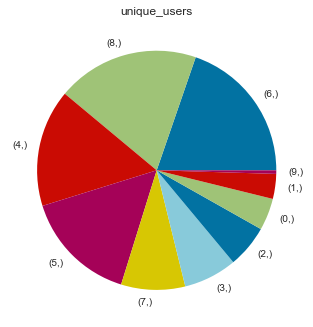

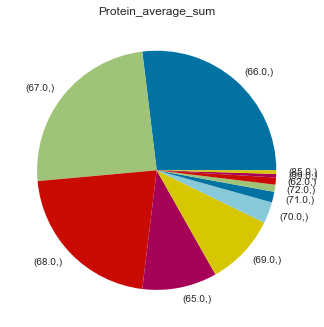

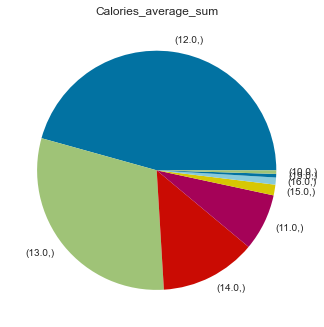

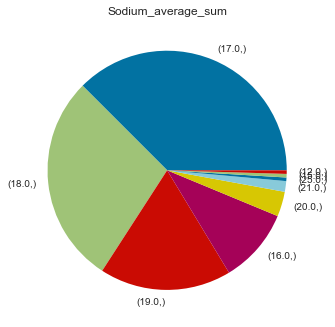

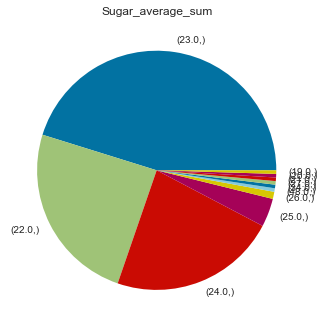

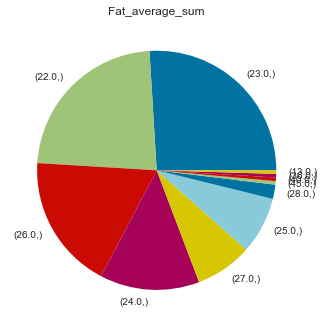

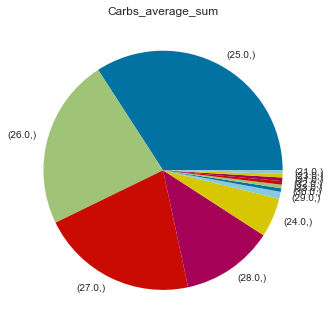

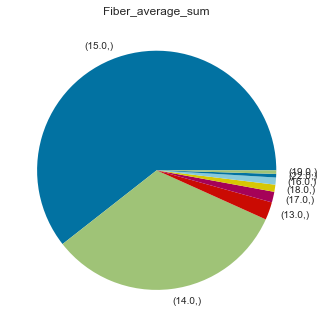

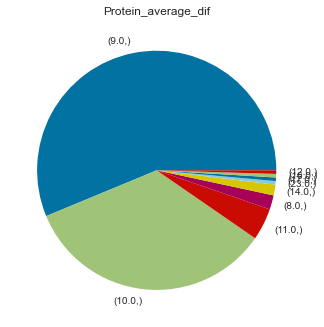

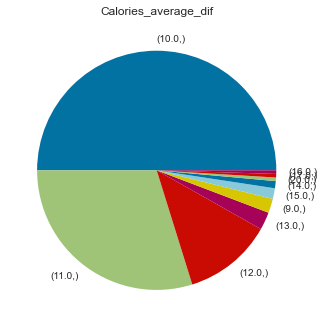

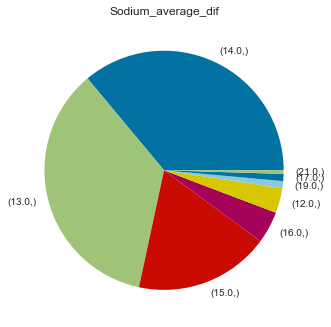

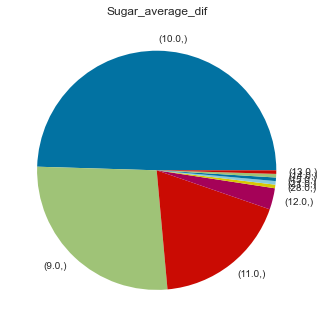

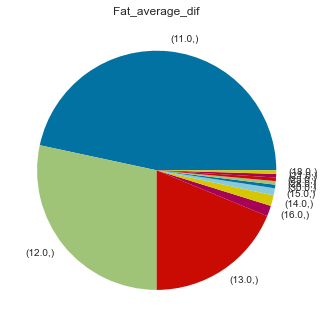

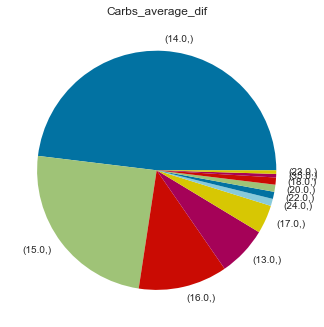

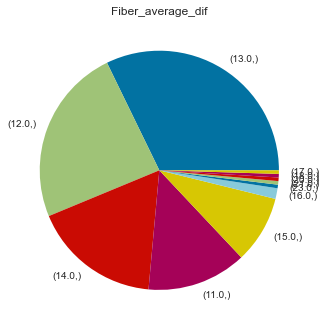

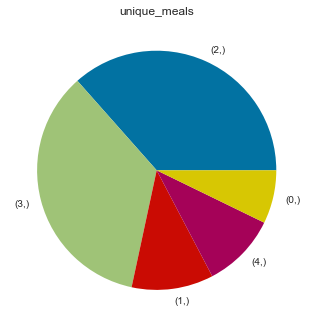

In [271]:
for feature in numerical_data.columns.values:
    draw_pie(feature, numerical_data.index, numerical_data)

In [272]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [273]:
hopkins(numerical_data)

0.9218964318964044

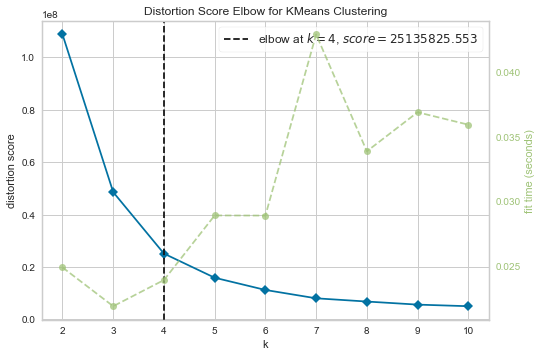

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [274]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(numerical_data)
visualizer.show()

In [275]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(numerical_data)
print(y)

clusters = [[] for _ in range(4)]
for indx, cluster in enumerate(y):
    clusters[cluster].append(indx)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 3
 3 3 3 3 0 0 3 3 3 3 0 0 0 3 3 3 3 3 0 0 3 3 3 3 3 0 0 3 3 3 3 0 0 0 3 3 0
 0 0 0 0 3 3 3 3 0 0 0 3 3 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3
 3 3 1 1 1 1 1 3 3 1 1 1 1 1 3 3 1 1 1 1 1 1 3 1 1 1 1 1 3 3 1 1 1 1 1 3 3
 1 1 1 1 1 3 3 1 1 1 1 1 3 3 1 1 1 1 3 3 3 1 1 1 1 1 3 3 1 1 1 1 3 3 3 3 3
 3 3 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2]


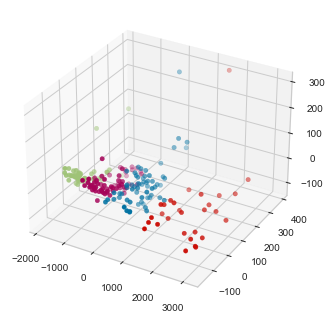

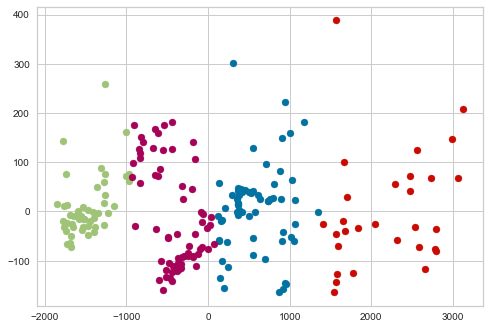

In [276]:
from sklearn.decomposition import PCA
def plot(X, clusters, dimension):
    if dimension == 3:
        ax = plt.figure().gca(projection='3d')
    else:
        ax = plt.figure().gca()
    for i, index in enumerate(clusters):
        point = X[index].T
        ax.scatter(*point)
    plt.show()
    
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(numerical_data))
plot(np.asarray(pca_components), clusters, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(numerical_data))
plot(np.asarray(pca_components), clusters, 2)

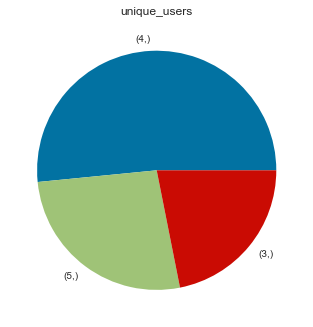

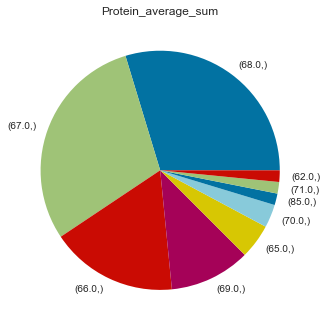

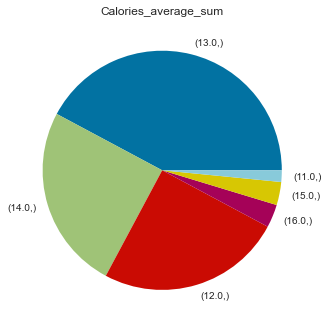

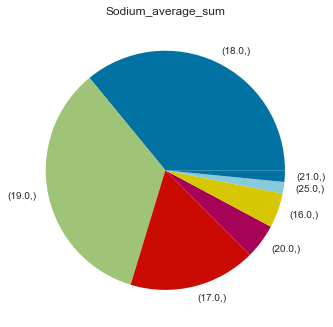

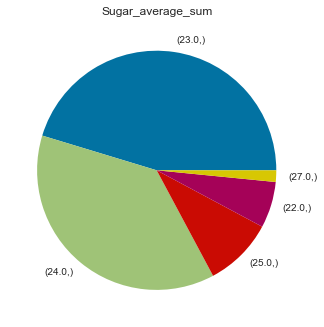

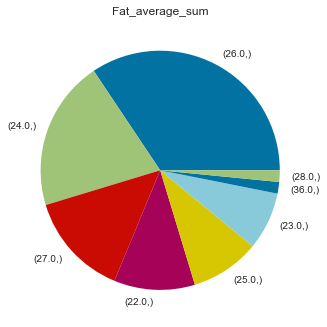

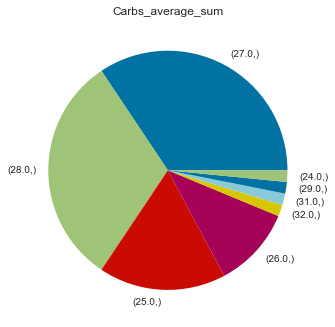

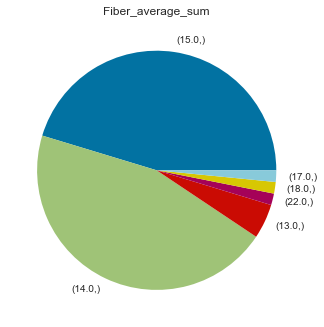

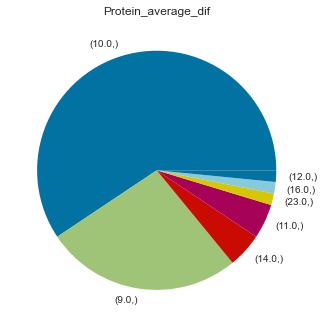

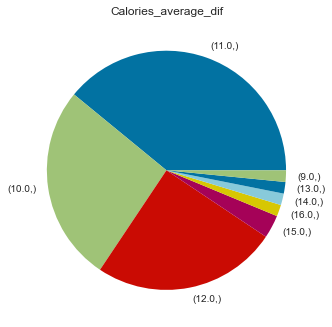

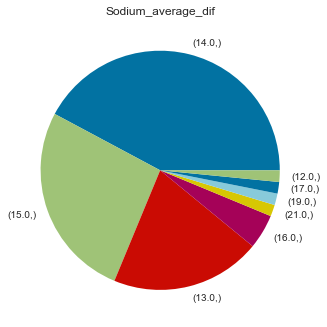

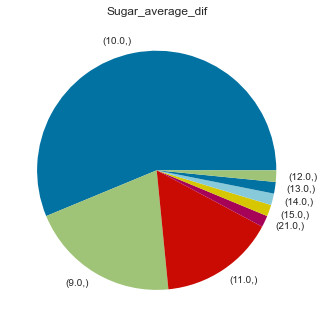

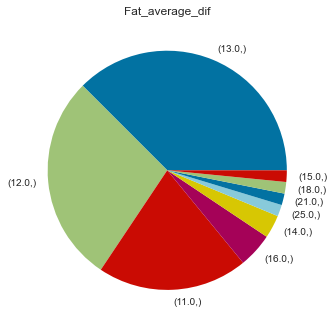

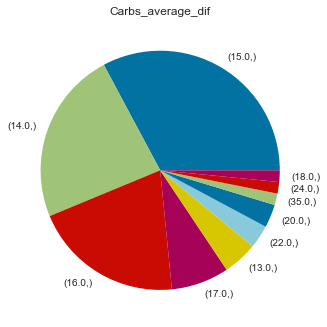

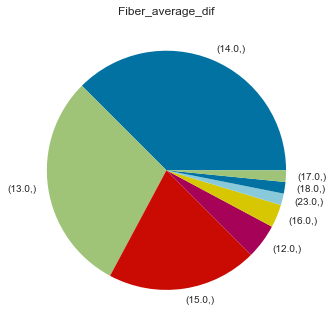

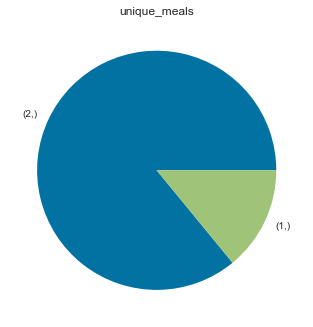

In [277]:
for feature in numerical_data.columns.values:
    draw_pie(feature, clusters[0], numerical_data)

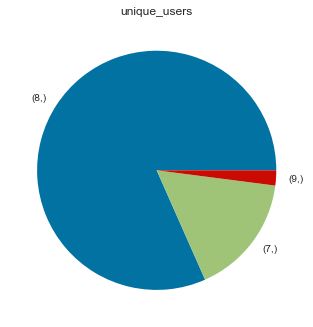

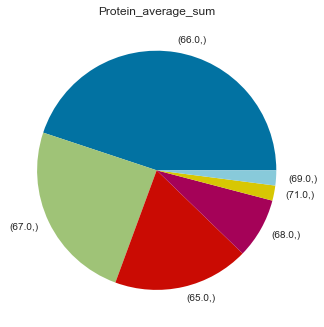

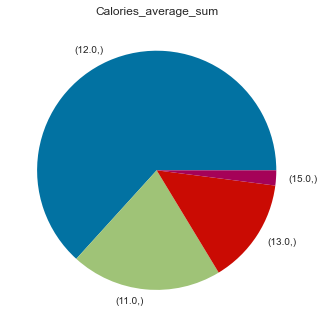

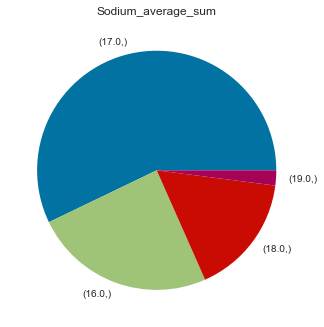

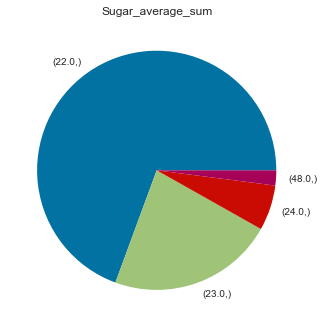

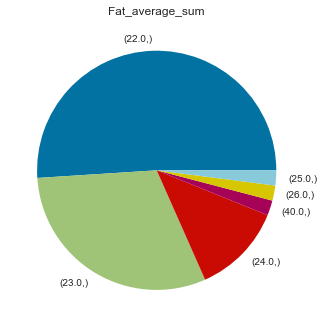

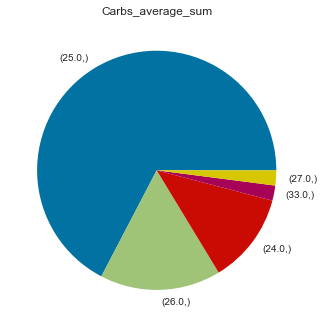

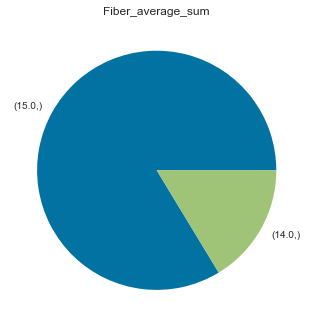

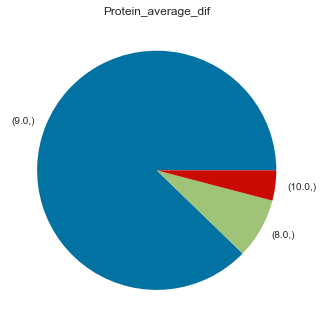

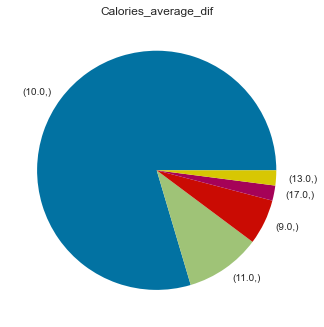

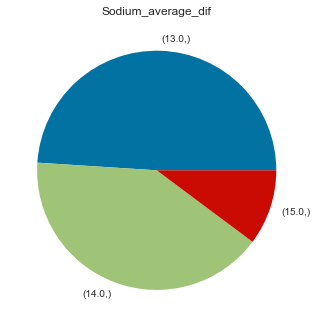

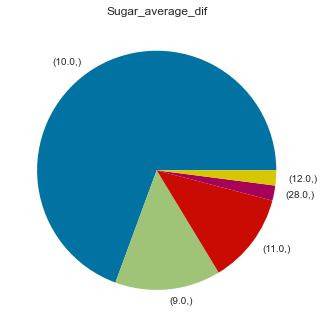

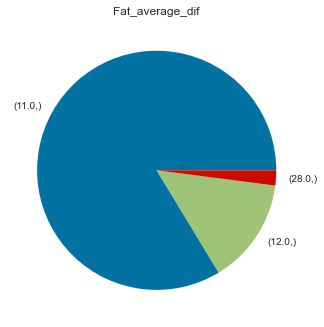

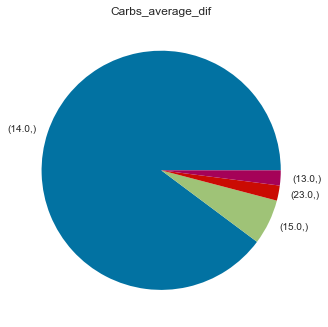

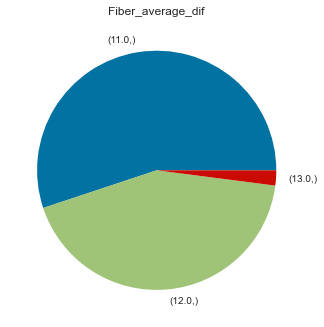

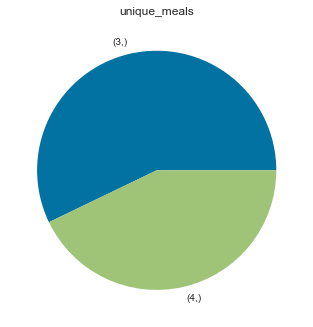

In [278]:
for feature in numerical_data.columns.values:
    draw_pie(feature, clusters[1], numerical_data)

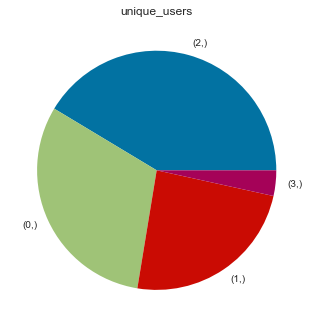

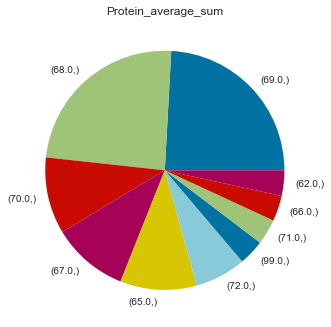

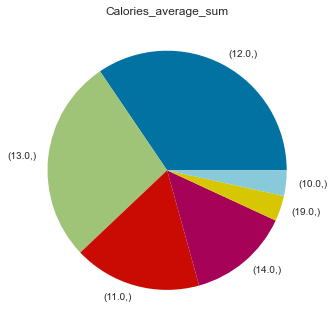

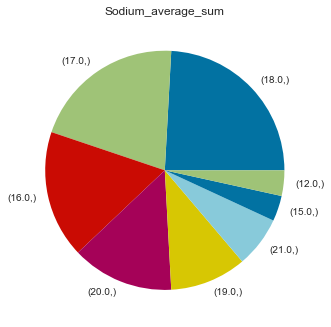

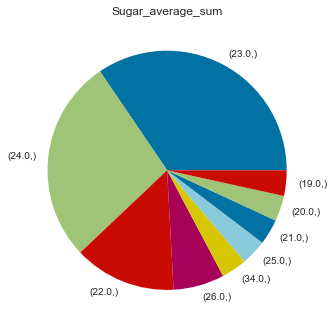

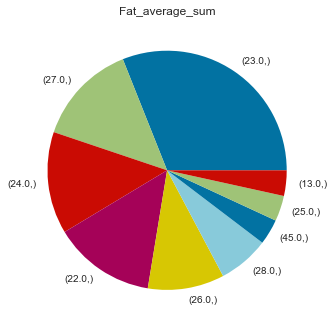

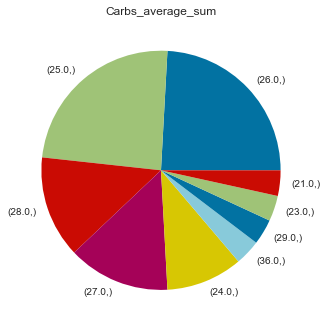

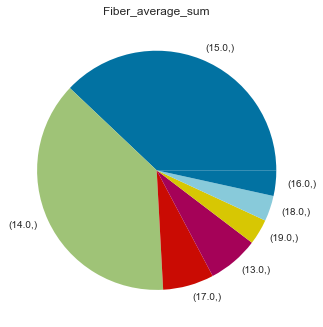

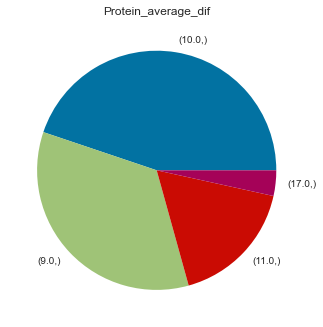

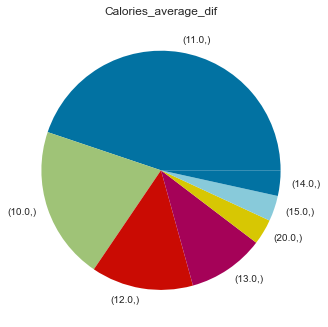

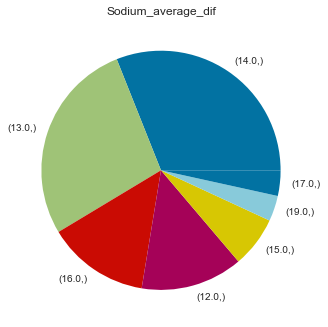

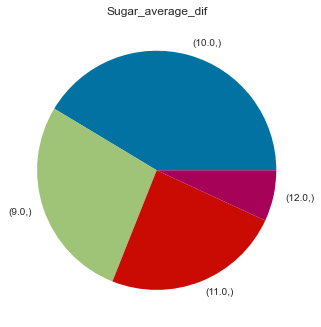

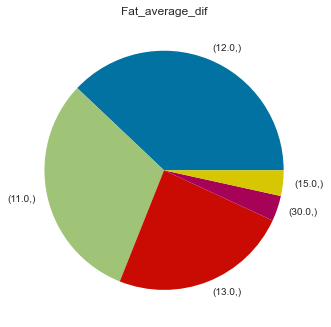

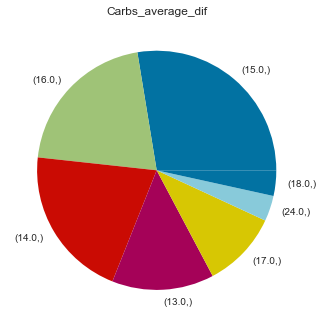

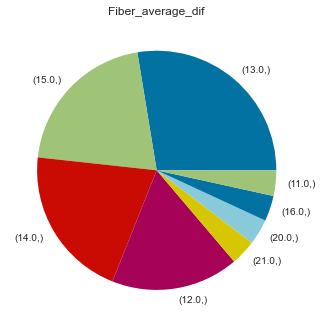

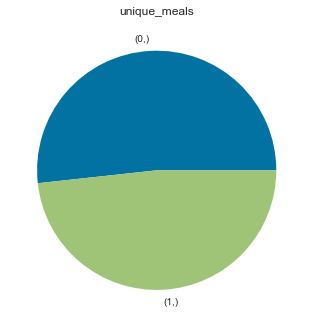

In [279]:
for feature in numerical_data.columns.values:
    draw_pie(feature, clusters[2], numerical_data)

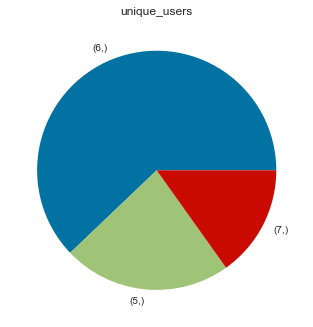

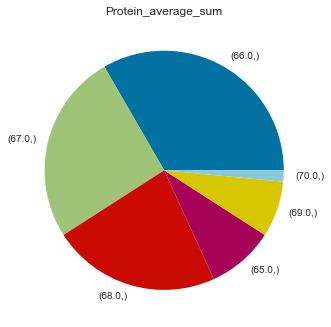

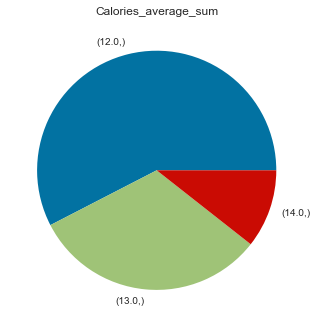

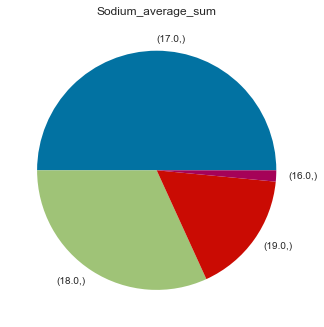

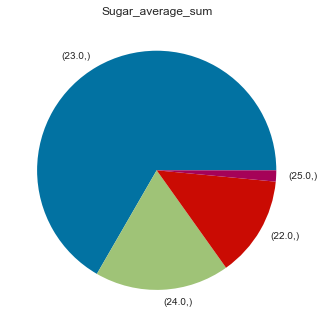

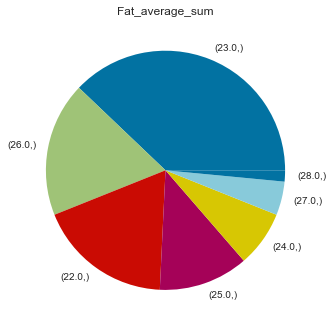

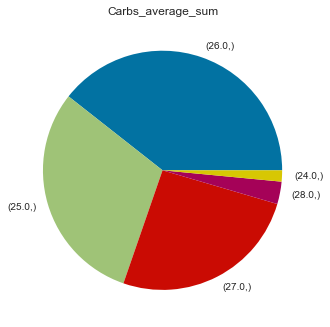

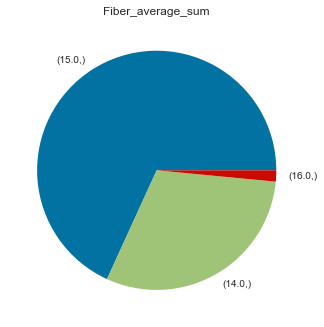

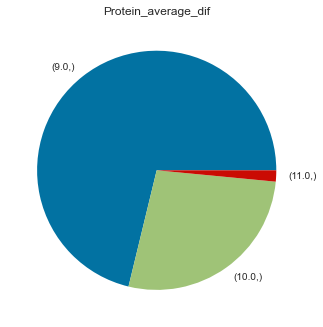

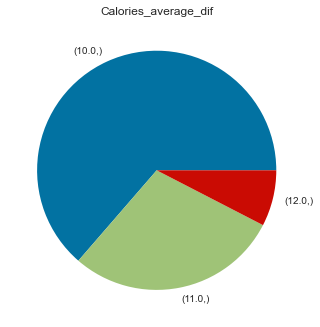

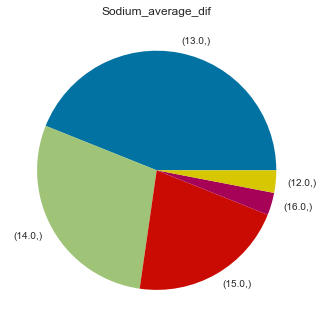

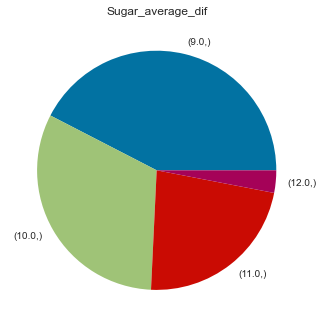

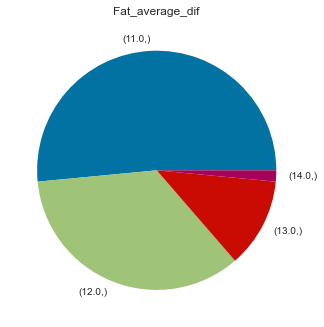

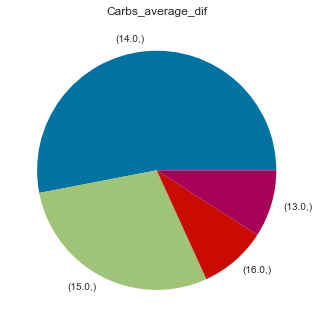

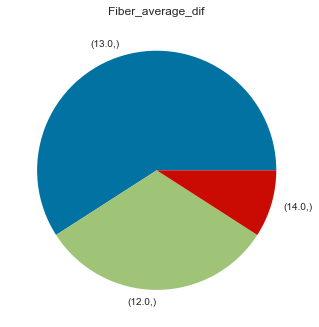

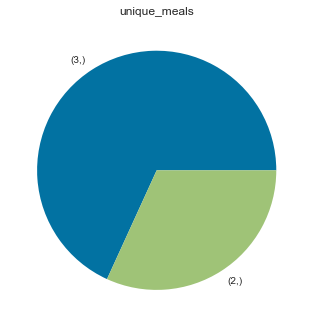

In [280]:
for feature in numerical_data.columns.values:
    draw_pie(feature, clusters[3], numerical_data)